<a href="https://colab.research.google.com/github/Rohith715/Machine-Learning/blob/main/pcos_it_seemsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('train.csv')
df.columns

Index(['ID', 'Age', 'Weight_kg', 'PCOS', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Conception_Difficulty',
       'Insulin_Resistance', 'Exercise_Frequency', 'Exercise_Type',
       'Exercise_Duration', 'Sleep_Hours', 'Exercise_Benefit'],
      dtype='object')

In [ ]:
df.head(5)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much


In [ ]:
for x in df.columns:
  print(df[x].value_counts())
  print("###################",end="")

ID
0      1
157    1
133    1
134    1
135    1
      ..
73     1
74     1
75     1
76     1
209    1
Name: count, Length: 210, dtype: int64
###################Age
20-25              125
15-20               50
Less than 20        18
35-44                4
25-30                4
45 and above         3
30-35                2
30-25                1
30-40                1
Less than 20-25      1
Name: count, dtype: int64
###################Weight_kg
47.0     12
56.0     11
53.0      9
52.0      9
55.0      8
70.0      8
41.0      7
54.0      7
49.0      7
66.0      7
59.0      6
48.0      6
51.0      6
67.0      5
45.0      5
60.0      5
62.0      5
57.0      5
58.0      5
50.0      5
43.0      4
68.0      4
65.0      4
63.0      3
61.0      3
42.0      3
30.0      3
40.0      3
64.0      3
44.0      3
71.0      3
85.0      2
74.0      2
46.0      2
73.0      2
72.0      2
69.0      2
92.0      1
54.6      1
84.0      1
91.0      1
79.0      1
80.0      1
37.5      1
36.0      1
20.0      1

In [ ]:
df.shape

(210, 14)

In [ ]:
df["Age"].value_counts(),df["Sleep_Hours"].value_counts()

(Age
 20-25              125
 15-20               50
 Less than 20        18
 35-44                4
 25-30                4
 45 and above         3
 30-35                2
 30-25                1
 30-40                1
 Less than 20-25      1
 Name: count, dtype: int64,
 Sleep_Hours
 6-8 hours             135
 Less than 6 hours      58
 9-12 hours             13
 More than 12 hours      1
 3-4 hours               1
 Name: count, dtype: int64)

In [ ]:
#converting the sleep ranges into an array
def fix_slp(df):
  ff=[]
  for x in df["Sleep_Hours"]:
    if isinstance(x,str):
      if x=="6-8 hours" :
        ff.append([6,7,8])
      if x=="Less than 6 hours":
        ff.append([0,1,2,3,4,5])
      if x=="9-12 hours":
        ff.append([9,10,11,12])
      if x=="More than 12 hours":
        ff.append([12,13,14])
      if x=="3-4 hours":
        ff.append([3,4])
    else:
      ff.append(np.nan)
  if len(ff) != len(df.index):
    # Handle the length mismatch here, either by extending or truncating ff
    # For example, to extend ff with NaN values:
    ff.extend([np.nan] * (len(df.index) - len(ff)))
  df["Sleep_Hours"]=ff
  return df
#df=fix_slp(df)

In [ ]:
df.head(5)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much


In [ ]:
#it needs some string processing in Excersize type
#cardip--1,,flex ---2, strength ---4,hit--8,no and none ---[-1],somewhat --0
def fix_extype(df):
  a=["Cardio","Flexibility and balance","Strength training","High-intensity interval training","No Exercise","None","Somewhat"]
  aa=[]
  for x in df["Exercise_Type"]:
    # Check if x is a string to avoid TypeError with NaN values
    if isinstance(x, str):
      score=0
      if str(a[0]) in x:
        score+=1
      if a[1] in x:
        score=score+2
      if a[2] in x:
        score=score+4
      if a[3] in x:
        score=score+8
      if a[4] in x or a[5] in x:
        score=score+0
      if a[6] in x:
        score=score+50
      aa.append(score)
    else:
      # Handle NaN or other non-string values as needed
      aa.append(np.nan)  # or any other default value
  df.insert(12,"variance_in_excersize",aa)
  return df
#df=fix_extype(df)

In [ ]:
df["Age"].value_counts()

,count
Age,
20-25,125
15-20,50
Less than 20,18
35-44,4
25-30,4
45 and above,3
30-35,2
30-25,1
30-40,1


In [ ]:
df["Weight_kg"].unique()

array([ 64. ,  55. ,  91. ,  56. ,  47. ,  41. ,  58. ,  85. ,  71. ,
        62. ,  75. ,  68. ,  66. ,  35. ,  72. ,  51. ,  52. ,  48. ,
        73. ,  53. ,  54. ,  38. ,  49. ,  88. ,  57. , 116. ,  44. ,
        43. ,  67. ,  45. ,  59. ,  50. ,  63. ,  46. ,  70. ,  40. ,
        60. ,  65. ,  48.5,  69. ,  37. ,  81. ,  61. ,   nan,  52.5,
        39. ,  42. ,  82. ,  79. ,  36.5,  74. ,  54.6,  84. ,  92. ,
        30. ,  80. ,  37.5,  36. ,  20. ,  53.6])

In [ ]:
#check of they are over weight!!!!
def check_overweight(df):
  over=[]
  for x in range(0,len(df)):
    if((df["Weight_kg"][x] != np.nan or df["Weight_kg"][x] != "nan") and (df["Age"][x] != np.nan or df["Age"][x]!= "nan")):
      aag=df["Age"][x]
      wt=df["Weight_kg"][x]
      if aag=="20-25" and wt in range(0,72):
        over.append(0)
      elif aag=="15-20" and wt in range(0,60):
        over.append(0)
      elif aag=="Less than 20" and wt in range(0,58):
        over.append(0)
      elif aag=="35-44" and wt in range(0,75):
        over.append(0)
      elif aag=="25-30" and wt in range(0,70):
        over.append(0)
      elif aag=="45 and above" and wt in range(0,75):
        over.append(0)
      elif aag=="30-35" and wt in range(0,70):
        over.append(0)
      elif aag=="30-25" and wt in range(0,70):
        over.append(0)
      elif aag=="30-40" and wt in range(0,75):
        over.append(0)
      elif aag=="20-25" and wt in range(0,65):
        over.append(0)
      else:
        over.append(1)
    else:
      over.append(np.nan)
  df.insert(11,"Overweight",over)
  return df
#df=check_overweight(df)



In [ ]:
df["Insulin_Resistance"].unique()

array(['No', 'Yes', nan, 'No, Yes, not diagnosed by a doctor'],
      dtype=object)

In [ ]:
#column that odentofies women that are over weight and have and inulin resistance
def wtxinsr(df):
  wtinsr=[]
  for x in range(0,len(df)):
    b=df["Insulin_Resistance"][x]
    if(df["Overweight"][x]==1 and b=="Yes" or b=="No, Yes, not diagnosed by a doctor"):
      wtinsr.append(1)
    elif b=="nan" or b== np.nan:
      wtinsr.append(np.nan)
    else:
      wtinsr.append(0)
  df.insert(10,"wtxinsr",wtinsr)
  return df
#df=wtxinsr(df)


In [ ]:
df.head(5)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much


In [ ]:
df["Age"].unique()

array(['20-25', '15-20', '45 and above', '30-35', '35-44', '25-30', nan,
       'Less than 20', '30-25', '30-40', 'Less than 20-25'], dtype=object)

In [ ]:
#conception difficulty below age 40
def concep(df):
  ff=[]
  age=['20-25', '15-20', '30-35', '35-44', '25-30',
       'Less than 20', '30-25', '30-40', 'Less than 20-25']
  for x in range(0,len(df)):
    if df["Conception_Difficulty"][x] != "nan" and df["Age"][x] != "nan" :
      if df["Conception_Difficulty"][x] != "No" and df["Age"][x] in age:
        ff.append(1)
      else:
        ff.append(0)
  df.insert(9,"concepxage",ff)
  return df
#df=concep(df)

In [ ]:
def nf_sleepdeprived(df):
  def check(arr, num):
    if hasattr(arr, '__iter__'):
      return any(x >= num for x in arr)
    # Handle the case where arr is not iterable (e.g., NaN)
    return False
  sldp=[]
  for x in range(0,len(df)):
    slp=df["Sleep_Hours"][x]
    if(slp != np.nan):
      if(check(slp,7)==True):
        sldp.append(0)
      else:
        sldp.append(1)
    else:
      sldp.append(np.nan)
  df.insert(13,"Sleep_deprived",sldp)
  return df
#df=nf_sleepdeprived(df)

In [ ]:
df.head(15)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much
5,5,20-25,41.0,No,Yes,No,Yes,No,No,Never,No Exercise,Not Applicable,Less than 6 hours,Somewhat
6,6,15-20,58.0,No,No,No,No,No,No,1-2 Times a Week,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
7,7,20-25,85.0,Yes,Yes,Yes,Yes,"Yes, diagnosed by a doctor",Yes,Rarely,No Exercise,Not Applicable,Less than 6 hours,Somewhat
8,8,20-25,71.0,Yes,Yes,No,No,No,No,Never,No Exercise,Not Applicable,Less than 6 hours,Not at All
9,9,20-25,62.0,No,No,No,No,No,No,Rarely,No Exercise,Less than 30 minutes,Less than 6 hours,Somewhat


In [ ]:
#df["variance_in_excersize"].value_counts()

In [ ]:
#df.drop("Sleep_Hours",axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
def encode(df):
  le = LabelEncoder()
  for x in df.columns:
    if df[x].dtype == 'object':
    # Create a temporary Series excluding null values
      non_null_values = df[x][df[x].notna()]

    # Fit the encoder on non-null values only
      le.fit(non_null_values)

    # Transform the non-null values and reassign to the original column
      df.loc[df[x].notna(), x] = le.transform(non_null_values)
  return df

In [ ]:
from sklearn.impute import KNNImputer
def impute(df):
  np.random.seed(42)
  imputer = KNNImputer(n_neighbors=5)
  df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
  return df


In [ ]:
df.head(8)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much
5,5,20-25,41.0,No,Yes,No,Yes,No,No,Never,No Exercise,Not Applicable,Less than 6 hours,Somewhat
6,6,15-20,58.0,No,No,No,No,No,No,1-2 Times a Week,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
7,7,20-25,85.0,Yes,Yes,Yes,Yes,"Yes, diagnosed by a doctor",Yes,Rarely,No Exercise,Not Applicable,Less than 6 hours,Somewhat


In [ ]:
#hyper androgenism and hirsutism[after endocing and imputing]
def hyperxhirs(df):
  total=[]
  for x in range(0,len(df)):
    if(df["Hyperandrogenism"][x]==1 and df["Hirsutism"][x]==2):
      total.append(1)
    else:
      total.append(0)
  df.insert(15,"hyperxhirs",total)
  return df
#df=hyperxhirs(df)


In [ ]:
#this is for sleep deprived and hormonal imbalance[apply after encoding and imputing]
def slpxhrmb(df):
  eff=[]
  for x in range(0,len(df)):
    if(df["Sleep_deprived"][x]==1 and df["Hormonal_Imbalance"][x]==2):
      eff.append(1)
    else:
      eff.append(0)
  df.insert(14,"slpdxhrmb",eff)
  return df
#df=slpxhrmb(df)


In [ ]:
def alldone(df):
  df=fix_slp(df)
  df=fix_extype(df)
  df=check_overweight(df)
  df=wtxinsr(df)
  df=concep(df)
  df=nf_sleepdeprived(df)
  df.drop(["Sleep_Hours","Exercise_Type"],axis=1,inplace=True)
  df=encode(df)
  df=impute(df)
  df=hyperxhirs(df)
  df=slpxhrmb(df)
  return df
df=alldone(df)

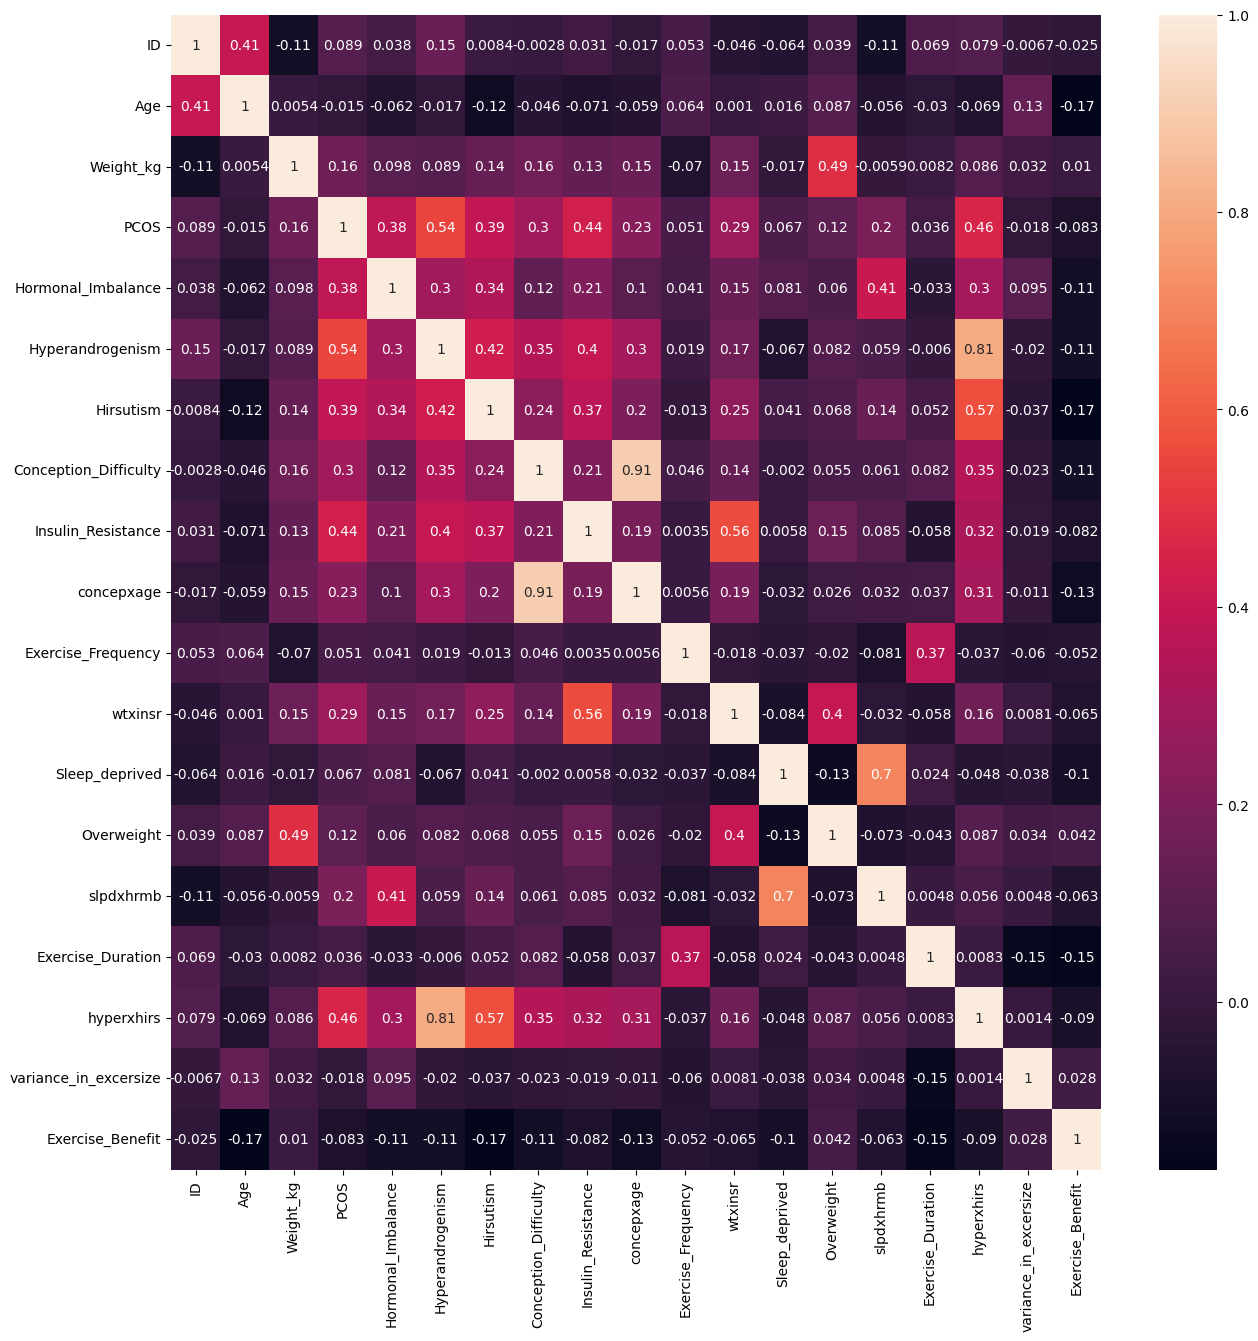

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Weight_kg,0
PCOS,0
Hormonal_Imbalance,0
Hyperandrogenism,0
Hirsutism,0
Conception_Difficulty,0
Insulin_Resistance,0
concepxage,0


In [ ]:
# Assuming 'df' is your DataFrame containing the data

# Set correlation threshold
threshold = 0.1

# Get the correlation matrix
corr_matrix = df.corr()

# Get features with low correlation to the target variable ("PCOS")
less_important_features = corr_matrix[corr_matrix["PCOS"].abs() < threshold].index.tolist()

# Remove the target variable from the list
#less_important_features.remove("PCOS")

# Print the less important features
print("Less important features:", less_important_features)

Less important features: ['ID', 'Age', 'Exercise_Frequency', 'Sleep_deprived', 'Exercise_Duration', 'variance_in_excersize', 'Exercise_Benefit']


In [ ]:
kf=df.copy()
kf.drop(less_important_features,axis=1,inplace=True)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=kf.drop("PCOS",axis=1)
y=kf["PCOS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score

model1 = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=11)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.873015873015873
0.6923076923076923
0.22461538461538466


In [ ]:
import xgboost as xgb
model2=xgb.XGBClassifier(objective='binary:logistic',random_state=4)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.873015873015873
0.6923076923076923
0.22461538461538466


In [ ]:
df.head()

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,concepxage,Exercise_Frequency,wtxinsr,Sleep_deprived,Overweight,slpdxhrmb,Exercise_Duration,hyperxhirs,variance_in_excersize,Exercise_Benefit
0,0.0,1.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0,1.0,0,1.0,2.0
1,1.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0,4.0,0,0.0,2.0
2,2.0,0.0,91.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0,4.0,0,1.0,2.0
3,3.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0,3.0,0,1.0,1.0
4,4.0,0.0,47.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0,7.0,0,0.0,0.0


In [ ]:
#prepping test data
tf=pd.read_csv('test.csv')
tf=alldone(tf)
tf.head()

,ID,Age,Weight_kg,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,concepxage,wtxinsr,Exercise_Duration,Sleep_deprived,Overweight,slpdxhrmb,variance_in_excersize,hyperxhirs,Exercise_Benefit
0,0.0,1.0,54.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,8.0,0.0,0.0,0,0.0,0,2.0
1,1.0,1.0,65.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,0,0.0,0,2.0
2,2.0,1.0,64.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,10.0,0.0,0.0,0,1.0,0,2.0
3,3.0,10.0,57.0,1.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,6.0,0.0,0.0,0,0.0,0,2.0
4,4.0,10.0,6.0,1.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,3.0,0.0,0.0,0,1.0,0,2.0


In [ ]:
lol=kf.drop("PCOS",axis=1)
model3=RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=11)
model3.fit(lol,kf["PCOS"])
kk=model3.predict(tf[lol.columns])
id=tf["ID"]
pd.DataFrame({"ID":id,"PCOS":kk}).to_csv("submission111.csv",index=False)